In [97]:
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# loading the stroke dataset
stroke_df = pd.read_csv("C:\\Users\\Student\\Desktop\\madhumitha\\data mining\\stroke.csv")

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
stroke_df['bmi']=stroke_df['bmi'].fillna(stroke_df['bmi'].median())

In [100]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [101]:
#using LabelEncoder and converting categorical features into numeric values
from sklearn.preprocessing import LabelEncoder

In [102]:
enc=LabelEncoder()

In [103]:
stroke_df=stroke_df.apply(enc.fit_transform)

In [104]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,239,1,1
1,3610,0,82,0,0,1,3,0,3588,154,2,1
2,2151,1,101,0,1,1,2,0,2483,198,2,1
3,4226,0,70,0,0,1,2,1,3385,217,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1


In [105]:
x=stroke_df.drop(columns=['id','stroke'])
y=stroke_df['stroke']

In [106]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [107]:
x.shape

(5110, 10)

In [108]:
y.shape

(5110,)

In [109]:
#This dataset is imbalanced, solving this problem by using SMOTE
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(x, y)

In [110]:
x_res.shape

(9722, 10)

In [111]:
y_res.shape

(9722,)

In [112]:
y_res.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [113]:
x_res.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3850,239,1
1,0,82,0,0,1,3,0,3588,154,2
2,1,101,0,1,1,2,0,2483,198,2
3,0,70,0,0,1,2,1,3385,217,3
4,0,100,1,0,1,3,0,3394,113,2


In [114]:
#normalizing data using StandardScaler
from sklearn.preprocessing import StandardScaler 

In [115]:
sc=StandardScaler()

In [116]:
x_new=sc.fit_transform(x_res)

In [117]:
x_new=pd.DataFrame(x_new,columns=x_res.columns)

In [118]:
x_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.467454,0.561788,-0.301680,4.397603,0.623584,0.041386,1.224430,1.483709,1.155961,-0.272619
1,-0.680805,0.288297,-0.301680,-0.227397,0.623584,1.067792,-0.816707,1.265258,-0.180306,0.765532
2,1.467454,1.154352,-0.301680,4.397603,0.623584,0.041386,-0.816707,0.343926,0.511409,0.765532
3,-0.680805,-0.258685,-0.301680,-0.227397,0.623584,0.041386,1.224430,1.096000,0.810104,1.803683
4,-0.680805,1.108770,3.314765,-0.227397,0.623584,1.067792,-0.816707,1.103504,-0.824858,0.765532


In [119]:
#splitting dataset into training and testing
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_res,test_size=0.2,random_state=957)

In [121]:
x_train.shape

(7777, 10)

In [122]:
x_test.shape

(1945, 10)

In [123]:
y_train.shape

(7777,)

In [124]:
y_test.shape

(1945,)

In [125]:
from sklearn.linear_model import LogisticRegression 

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
from sklearn.svm import SVC

In [128]:
from sklearn.naive_bayes import GaussianNB

In [129]:
Lr=LogisticRegression()

In [130]:
Knn=KNeighborsClassifier()

In [131]:
Svm=SVC(probability=True)

In [132]:
Nb=GaussianNB()

In [133]:
#building logistic regression model using training set
Lr.fit(x_train,y_train)

LogisticRegression()

In [134]:
##building KNearest Neighbour Classifier model using training set
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [135]:
#building Support Vector Machine Classifier model using training set
Svm.fit(x_train,y_train)

SVC(probability=True)

In [136]:
#building Naive Bayes model using the training set
Nb.fit(x_train,y_train)

GaussianNB()

In [137]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [138]:
y_pred_Lr=Lr.predict(x_test)
y_pred_Knn=Knn.predict(x_test)
y_pred_Svm=Svm.predict(x_test)
y_pred_Nb=Nb.predict(x_test)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [139]:
y_pred_Lr_prob=Lr.predict_proba(x_test)
y_pred_Knn_prob=Knn.predict_proba(x_test)
y_pred_Svm_prob=Svm.predict_proba(x_test)
y_pred_Nb_prob=Nb.predict_proba(x_test)

In [140]:
#evaluating and printing values for logistic regression
print('logistic regression')
print(accuracy_score(y_test,y_pred_Lr))
print(confusion_matrix(y_test,y_pred_Lr))
print(classification_report(y_test,y_pred_Lr))
print(roc_auc_score(y_test, y_pred_Lr_prob[:,1]))

logistic regression
0.8123393316195373
[[781 226]
 [139 799]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1007
           1       0.78      0.85      0.81       938

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.82      0.81      0.81      1945

0.8925326552088471


In [141]:
#evaluating and printing values for K Nearest Neighbor Classifier
print('Knn')
print(accuracy_score(y_test,y_pred_Knn))
print(confusion_matrix(y_test,y_pred_Knn))
print(classification_report(y_test,y_pred_Knn))
print(roc_auc_score(y_test, y_pred_Knn_prob[:,1]))

Knn
0.86426735218509
[[796 211]
 [ 53 885]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1007
           1       0.81      0.94      0.87       938

    accuracy                           0.86      1945
   macro avg       0.87      0.87      0.86      1945
weighted avg       0.87      0.86      0.86      1945

0.9302351556164418


In [142]:
#evaluating and printing values for Support Vector Machine
print('Svm')
print(accuracy_score(y_test,y_pred_Svm))
print(confusion_matrix(y_test,y_pred_Svm))
print(classification_report(y_test,y_pred_Svm))
print(roc_auc_score(y_test, y_pred_Knn_prob[:,1]))

Svm
0.8611825192802056
[[842 165]
 [105 833]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1007
           1       0.83      0.89      0.86       938

    accuracy                           0.86      1945
   macro avg       0.86      0.86      0.86      1945
weighted avg       0.86      0.86      0.86      1945

0.9302351556164418


In [143]:
#evaluating and printing values for Naive Bayes
print('Nb')
print(accuracy_score(y_test,y_pred_Nb))
print(confusion_matrix(y_test,y_pred_Nb))
print(classification_report(y_test,y_pred_Nb))
print(roc_auc_score(y_test, y_pred_Nb_prob[:,1]))

Nb
0.7958868894601543
[[706 301]
 [ 96 842]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1007
           1       0.74      0.90      0.81       938

    accuracy                           0.80      1945
   macro avg       0.81      0.80      0.79      1945
weighted avg       0.81      0.80      0.79      1945

0.8871291153820908


In [144]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_Lr_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_Knn_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_Svm_prob[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_Nb_prob[:,1], pos_label=1)                    

In [145]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

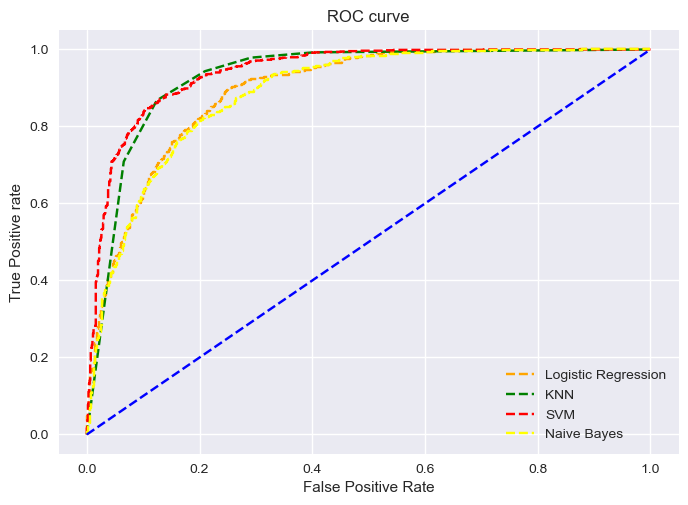

In [146]:
plt.style.use('seaborn')

# for plotting roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='SVM')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title of the curve
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

We can choose either knn or svm those are best models out of all the models.